# Evaluating User trials

In [31]:
%matplotlib widget
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
print(plt.rcParams.keys())
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['font.size'] = '15'

from scipy.stats import *

import pandas as pd
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import pingouin as pg
import pylab as py

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [32]:
methods = ['Base-IK', 'MILD', 'MILD-IK']
all_idx = np.arange(19)
rocket_idx = np.arange(10)
handshake_idx = np.arange(10,19)

rows_to_use = all_idx


all_labels = np.array(["Pleasantness", "Excitement level", "Human-likeness", "Naturalness", "Friendliness", "Comfort", "Timing", "Accuracy", "Annoyance", "Aggression", "Awkwardness", "Scariness", "Satisfaction", "Effortlessness\nbetween\nthe two trials", "Habituation to the\nrobot between\nthe two trials", "I had to change the way\nI act to get the robot\nto respond correctly"])
labels_dict = {all_labels[i]:i for i in range(len(all_labels))}

labels_to_use = all_labels[:]
# labels_to_use = np.array(["Human-likeness", "Naturalness", "Friendliness", "Comfort", "Timing", "Accuracy", "Awkwardness", "Satisfaction", "Effortlessness between\nthe two trials"])
cols_to_use = np.array([labels_dict[l] for l in labels_to_use])
labels = all_labels[cols_to_use]


baseik_values = np.array([list(map(float,i.split('\t'))) for i in """4	3	3	4	4	3	3	3	2	2	2	2	3	4	4	3
4	4	4	3	5	4	4	3	1	1	2	1	4	4	4	5
4	5	4	5	4	3	4	4	1	1	2	1	4	4	4	2
5	5	5	5	5	5	5	5	1	1	1	1	5	5	5	4
3	3	2	3	3	3	2	2	1	1	2	1	3	1	2	1
5	5	4	4	5	5	5	5	1	1	1	1	5	1	5	1
4	5	2	2	4	3	2	3	1	1	1	1	4	2	2	4
2	3	2	4	5	4	4	3	2	1	3	1	3	4	4	4
5	5	4	4	5	5	4	4	1	1	1	1	4	4	5	4
4	4	1	2	4	4	2	1	1	1	1	1	1	2	4	4
3	4	2	2	3	2	4	2	1	1	2	1	3	3	5	1
4	4	3	4	4	3	5	5	2	1	2	1	4	3	3	2
3	3	2	2	2	2	4	2	3	1	4	1	2	4	4	5
4	4	3	3	3	4	4	4	3	1	2	1	4	4	4	4
2	4	4	2	4	2	4	2	1	1	2	1	2	4	4	5
3	4	2	3	4	3	3	3	1	1	4	1	4	5	5	4
2	3	1	1	3	3	2	2	3	3	3	3	2	3	3	3
4	4	2	4	4	4	5	5	1	1	4	1	4	5	5	1
1	3	1	1	1	1	2	1	3	1	4	1	1	2	4	5""".split('\n')])[rows_to_use][:, cols_to_use]

mild_values = np.array([list(map(float,i.split('\t'))) for i in """5	5	4	4	4	3	3	4	2	2	3	2	4	5	5	4
4	4	3	3	4	4	4	2	1	1	4	1	4	3	3	4
3	3	2	3	2	2	3	2	3	1	4	1	2	3	2	4
5	5	4	5	5	5	5	5	1	1	1	1	5	5	5	4
3	4	2	3	3	3	2	2	1	1	2	1	3	1	4	1
2	2	1	2	3	4	2	2	4	1	3	2	2	3	3	4
4	4	2	1	4	4	2	1	1	1	1	1	2	2	2	3
4	3	2	2	4	3	2	1	2	2	3	1	2	2	2	4
5	4	4	4	5	5	4	2	1	1	1	1	4	2	4	5
3	2	1	2	5	4	2	1	1	1	1	1	2	2	2	5
4	3	4	3	5	4	4	4	1	1	1	1	4	3	3	1
3	4	3	2	4	3	5	2	1	1	2	1	4	4	4	4
5	4	4	4	4	4	5	5	1	1	3	1	4	4	4	1
3	2	2	3	3	2	4	2	4	1	4	1	3	4	4	4
4	4	4	4	4	4	4	2	2	1	1	1	4	5	5	5
2	4	2	2	3	2	5	4	4	3	4	2	3	4	4	3
2	4	1	1	3	2	2	2	3	3	4	3	2	3	4	4
2	4	1	1	4	3	5	4	1	1	5	1	4	4	4	1
3	3	1	1	3	2	3	2	1	1	4	1	3	4	5	5""".split('\n')])[rows_to_use][:, cols_to_use]

mildik_values = np.array([list(map(float,i.split('\t'))) for i in """5	5	5	4	5	4	5	4	1	1	2	1	4	5	5	4
4	5	4	3	4	4	5	4	1	1	4	1	4	5	4	4
4	5	4	4	4	4	4	4	1	3	2	2	4	4	4	1
5	5	5	5	5	5	5	5	1	1	1	1	5	5	5	4
3	3	2	3	4	4	2	2	1	1	3	1	4	1	4	1
4	4	3	4	4	5	4	4	2	1	1	1	4	1	1	2
4	4	3	3	4	4	4	3	1	1	1	1	4	4	4	4
4	4	4	4	4	4	4	3	2	1	2	2	4	4	4	3
5	4	4	4	5	5	4	4	1	1	1	1	4	5	5	4
3	2	4	4	4	4	3	4	1	1	1	1	5	4	4	2
3	3	3	3	4	4	5	4	1	1	1	1	4	4	5	4
4	4	3	4	3	4	5	4	2	1	3	1	4	5	4	2
3	4	3	3	4	4	5	5	1	1	4	1	3	5	4	2
2	2	1	1	2	2	4	4	4	1	4	1	2	2	4	3
5	4	5	5	5	5	5	5	1	1	1	1	5	5	4	1
4	3	3	3	4	4	3	4	2	2	2	1	4	5	4	5
2	4	1	1	3	1	2	2	3	3	4	3	2	4	3	4
4	3	4	4	5	4	5	5	1	1	4	1	4	4	5	1
3	3	3	2	2	3	4	4	1	1	2	1	4	5	4	5""".split('\n')])[rows_to_use][:, cols_to_use]

baseik_ranks = np.array(list(map(float,"""3
1
2
2
2
1
2
2
2
2
3
2
3
1
3
3
3
1
3""".split('\n'))))[rows_to_use]
mild_ranks = np.array(list(map(float,"""2
3
3
3
3
3
3
3
3
3
2
3
1
2
2
2
1
3
2""".split('\n'))))[rows_to_use]
mildik_ranks = np.array(list(map(float,"""1
2
1
1
1
2
1
1
1
1
1
1
2
3
1
1
2
2
1""".split('\n'))))[rows_to_use]

baseik_hatch = '.'
mild_hatch = '//'
mildik_hatch = '*'

legend_props = { "size": 15, "weight":"bold" }

stat_test = ttest_rel

width = 0.2
spacing = width+0.05
colors = get_cmap()(np.linspace(0.1,1,3))



In [33]:
d = {labels_to_use[i]:np.concatenate([baseik_values[:,i], mild_values[:,i], mildik_values[:,i]]) for i in range(len(labels_to_use))}
d['participant'] = np.tile(rows_to_use+1, 3)
d['method'] = np.repeat([1,2,3], len(rows_to_use))
df = pd.DataFrame(d)
for i in range(len(labels_to_use)):
    anova = AnovaRM(data=df, depvar=labels_to_use[i], subject='participant', within=['method']).fit().anova_table
    s = labels_to_use[i]
    key = 'method'
    keys = ['F Value', 'Pr > F']
    s += f'\t{anova[keys[0]][key]:.3e}'
    s += f'\t{anova[keys[1]][key]:.3f}'
    print(s)
for i in range(len(labels_to_use)):
    spher, W, chisq, dof, pval = pg.sphericity(data=df, dv=labels_to_use[i], subject='participant', within='method')

    # sm.qqplot(d[labels_to_use[i]], line ='r')
    # py.show()
    print(AnovaRM(data=df, depvar=labels_to_use[i], subject='participant', within=['method']).fit().anova_table)


Pleasantness	5.968e-01	0.556
Excitement level	1.129e+00	0.335
Human-likeness	5.680e+00	0.007
Naturalness	3.487e+00	0.041
Friendliness	3.214e-01	0.727
Comfort	3.624e+00	0.037
Timing	4.612e+00	0.016
Accuracy	8.491e+00	0.001
Annoyance	1.322e+00	0.279
Aggression	7.683e-01	0.471
Awkwardness	2.046e+00	0.144
Scariness	5.870e-01	0.561
Satisfaction	3.182e+00	0.053
Effortlessness
between
the two trials	4.519e+00	0.018
Habituation to the
robot between
the two trials	1.286e+00	0.289
I had to change the way
I act to get the robot
to respond correctly	1.043e+00	0.363
         F Value  Num DF  Den DF    Pr > F
method  0.596817     2.0    36.0  0.555917
         F Value  Num DF  Den DF    Pr > F
method  1.128814     2.0    36.0  0.334596
         F Value  Num DF  Den DF    Pr > F
method  5.680426     2.0    36.0  0.007176
         F Value  Num DF  Den DF    Pr > F
method  3.486911     2.0    36.0  0.041283
         F Value  Num DF  Den DF    Pr > F
method  0.321429     2.0    36.0  0.727172
        F 

I had to change the way
I act to get the robot
to respond correctly	1.000e+00 3.306e-01 2.871e-01 3.626e-01
Habituation to the
robot between
the two trials	2.175e-01 4.084e-01 4.202e-01 2.888e-01
Effortlessness
between
the two trials	4.477e-01 2.342e-02 5.676e-03 1.775e-02
Satisfaction	1.897e-01 2.092e-01 1.849e-02 5.338e-02
Scariness	1.000e+00 4.535e-01 4.535e-01 5.612e-01
Awkwardness	1.000e+00 6.071e-02 4.128e-03 1.440e-01
Aggression	6.669e-01 1.383e-02 1.400e-02 4.713e-01
Annoyance	1.886e-01 2.072e-02 6.360e-05 2.792e-01
Accuracy	3.986e-01 5.778e-01 6.910e-02 9.534e-04
Timing	1.868e-01 4.291e-01 7.162e-01 1.648e-02
Comfort	8.800e-02 1.000e+00 8.800e-02 3.682e-02
Friendliness	1.628e-01 5.778e-01 6.669e-01 7.272e-01
Naturalness	8.711e-01 6.881e-02 1.493e-02 4.128e-02
Human-likeness	8.413e-01 1.899e-02 2.226e-02 7.176e-03
Excitement level	2.326e-01 8.534e-01 1.487e-01 3.346e-01
Pleasantness	5.416e-01 3.908e-01 2.048e-01 5.559e-01


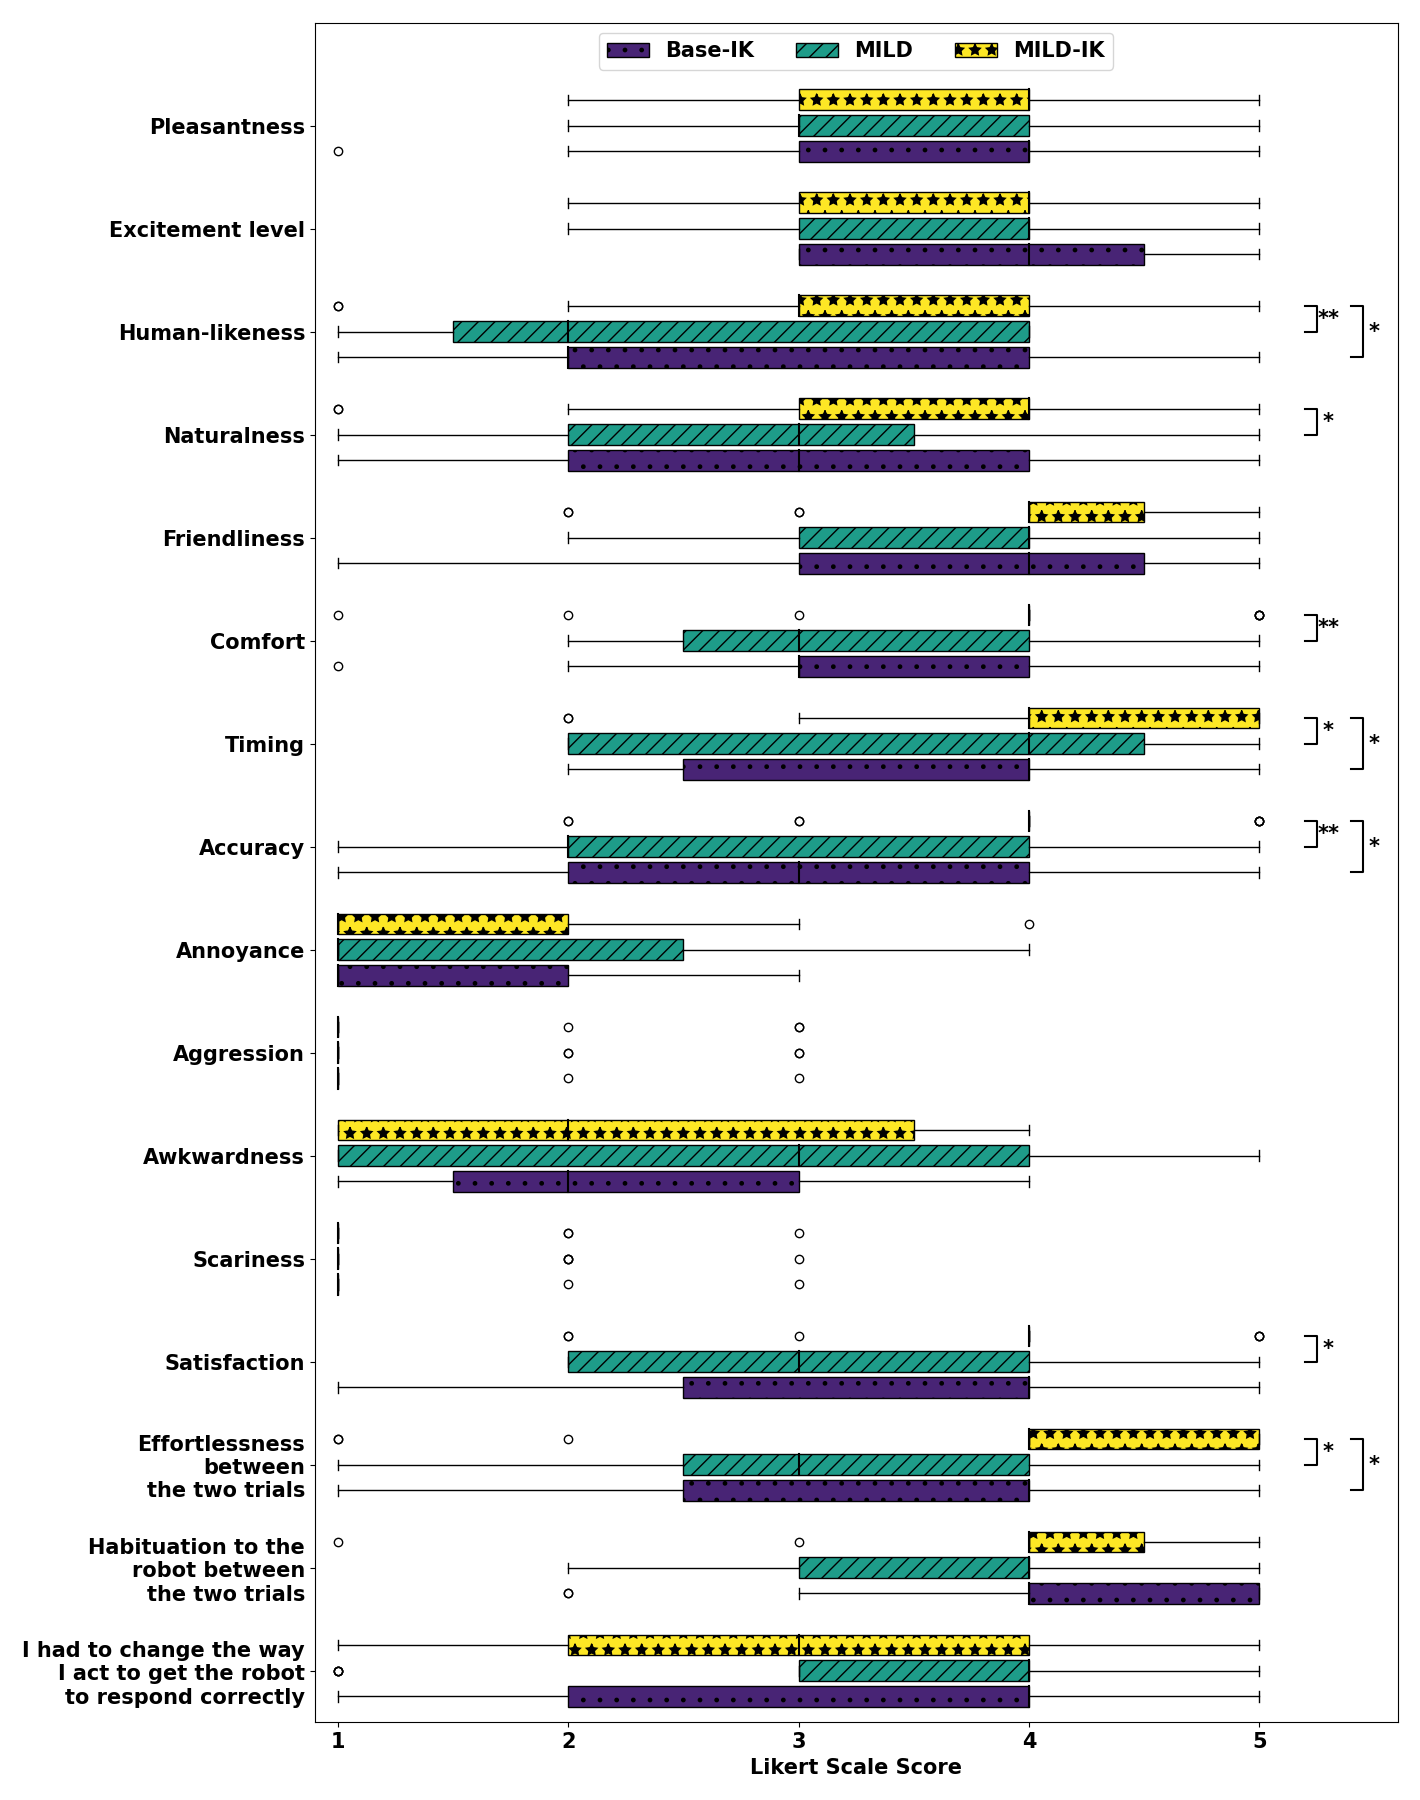

In [34]:
boxplot_kwargs = dict(
	showfliers=True, widths=[width], patch_artist = True,
	medianprops = dict(color = "black", linewidth = 1.5),
	vert=False,
)



if not boxplot_kwargs['vert']:
	labels_to_use = labels_to_use[::-1]
	fig1 = plt.figure(figsize=(7.1*2,9*2))
else:
	fig1 = plt.figure(figsize=(len(labels_to_use)*2,14))

ax_box = fig1.add_subplot(1,1,1)
for idx in np.arange(len(labels_to_use)):
	if not boxplot_kwargs['vert']:
		i = len(labels_to_use) -1 - idx
		bp1 = ax_box.boxplot(baseik_values[:, idx], positions=[i-spacing], boxprops = dict(facecolor=colors[0]), **boxplot_kwargs)
		bp2 = ax_box.boxplot(mild_values[:, idx], positions=[i], boxprops = dict(facecolor=colors[1]), **boxplot_kwargs)
		bp3 = ax_box.boxplot(mildik_values[:, idx], positions=[i+spacing], boxprops = dict(facecolor=colors[2]), **boxplot_kwargs)
		
		
		res12 = stat_test(baseik_values[:, idx], mild_values[:, idx])
		res13 = stat_test(baseik_values[:, idx], mildik_values[:, idx])
		res23 = stat_test(mild_values[:, idx], mildik_values[:, idx])
		anova = AnovaRM(data=df, depvar=labels_to_use[idx], subject='participant', within=['method']).fit().anova_table
		anova_pval = anova['Pr > F']['method']
		print(f'{labels_to_use[idx]}\t{res12.pvalue:.3e} {res13.pvalue:.3e} {res23.pvalue:.3e} {anova_pval:.3e}')
		count = 0
		ymax = np.max([baseik_values[:, i].mean(0), mild_values[:, i].mean(0), mildik_values[:, i].mean(0)])
		if res12.pvalue < 0.05:
			count = 1
			ax_box.plot(np.array([0.2,0.25,0.25,0.2])+5, [i-spacing,i-spacing,i,i], 'k-')
			if res12.pvalue < 0.01:
				ax_box.text(5.3, i-spacing/2, '**', horizontalalignment='center', verticalalignment='center')
			else:
				ax_box.text(5.3, i-spacing/2, '*', horizontalalignment='center', verticalalignment='center')
		if res23.pvalue < 0.05:
			count = 1
			ax_box.plot(np.array([0.2,0.25,0.25,0.2])+5, [i,i,i+spacing,i+spacing], 'k-')
			if res23.pvalue < 0.01:
				ax_box.text(5.3, i+spacing/2, '**', horizontalalignment='center', verticalalignment='center')
			else:
				ax_box.text(5.3, i+spacing/2, '*', horizontalalignment='center', verticalalignment='center')
		if res13.pvalue < 0.05:
			ax_box.plot(np.array(np.array([0.2,0.25,0.25,0.2])+5)+count*0.2, [i-spacing,i-spacing,i+spacing,i+spacing], 'k-')
			if res13.pvalue < 0.01:
				ax_box.text(5.3+count*0.2, i, '**', horizontalalignment='center', verticalalignment='center')
			else:
				ax_box.text(5.3+count*0.2, i, '*', horizontalalignment='center', verticalalignment='center')
			count += 1
		# if anova_pval < 0.05:
		# 	ax_box.plot(np.array(np.array([0.2,0.25,0.25,0.2])+5)+count*0.2, [i-spacing,i-spacing,i+spacing,i+spacing], 'k-')
		# 	ax_box.plot(np.array(np.array([0.2,0.25])+5)+count*0.2, [i,i], 'k-')
		# 	if anova_pval < 0.01:
		# 		ax_box.text(5.3+count*0.2, i, '**', horizontalalignment='center', verticalalignment='center')
		# 	else:
		# 		ax_box.text(5.3+count*0.2, i, '*', horizontalalignment='center', verticalalignment='center')

	else:
		i = idx
		bp1 = ax_box.boxplot(baseik_values[:, idx], positions=[i-spacing], boxprops = dict(facecolor=colors[0]), **boxplot_kwargs)
		bp2 = ax_box.boxplot(mild_values[:, idx], positions=[i], boxprops = dict(facecolor=colors[1]), **boxplot_kwargs)
		bp3 = ax_box.boxplot(mildik_values[:, idx], positions=[i+spacing], boxprops = dict(facecolor=colors[2]), **boxplot_kwargs)
		
		
		res12 = stat_test(baseik_values[:, idx], mild_values[:, i])
		res13 = stat_test(baseik_values[:, idx], mildik_values[:, i])
		res23 = stat_test(mild_values[:, idx], mildik_values[:, i])
		anova = AnovaRM(data=df, depvar=labels_to_use[i], subject='participant', within=['method']).fit().anova_table
		anova_pval = anova['Pr > F']['method']
		print(f'{labels_to_use[i]}\t{res12.pvalue:.3e} {res13.pvalue:.3e} {res23.pvalue:.3e} {anova_pval:.3e}')
		count = 0
		ymax = np.max([baseik_values[:, i].mean(0), mild_values[:, i].mean(0), mildik_values[:, i].mean(0)])
		if res12.pvalue < 0.05:
			count = 1
			ax_box.plot([i-spacing,i-spacing,i,i], np.array([0.2,0.25,0.25,0.2])+5, 'k-')
			if res12.pvalue < 0.01:
				ax_box.text(i-spacing/2, 5.3, '**', horizontalalignment='center', verticalalignment='center')
			else:
				ax_box.text(i-spacing/2, 5.3, '*', horizontalalignment='center', verticalalignment='center')
		if res23.pvalue < 0.05:
			count = 1
			ax_box.plot([i,i,i+spacing,i+spacing],np.array([0.2,0.25,0.25,0.2])+5, 'k-')
			if res23.pvalue < 0.01:
				ax_box.text(i+spacing/2, 5.3, '**', horizontalalignment='center', verticalalignment='center')
			else:
				ax_box.text(i+spacing/2, 5.3, '*', horizontalalignment='center', verticalalignment='center')
		if res13.pvalue < 0.05:
			ax_box.plot([i-spacing,i-spacing,i+spacing,i+spacing],np.array(np.array([0.2,0.25,0.25,0.2])+5)+count*0.2, 'k-')
			if res13.pvalue < 0.01:
				ax_box.text(i, 5.3+count*0.2, '**', horizontalalignment='center', verticalalignment='center')
			else:
				ax_box.text(i, 5.3+count*0.2, '*', horizontalalignment='center', verticalalignment='center')
			count += 1
		# if anova_pval < 0.05:
		# 	ax_box.plot([i-spacing,i-spacing,i+spacing,i+spacing], np.array(np.array([0.2,0.25,0.25,0.2])+5)+count*0.2, 'k-')
		# 	ax_box.plot([i,i], np.array(np.array([0.2,0.25])+5)+count*0.2, 'k-')
		# 	if anova_pval < 0.01:
		# 		ax_box.text(i, 5.3+count*0.2, '**', horizontalalignment='center', verticalalignment='center')
		# 	else:
		# 		ax_box.text(i, 5.3+count*0.2, '*', horizontalalignment='center', verticalalignment='center')
	bp1["boxes"][0].set(hatch=baseik_hatch)
	bp2["boxes"][0].set(hatch=mild_hatch)
	bp3["boxes"][0].set(hatch=mildik_hatch)


if not boxplot_kwargs['vert']:
	ax_box.set_xlabel('Likert Scale Score')
	ax_box.set_yticks(np.arange(len(labels_to_use)), labels_to_use)
	ax_box.set_xticks(np.arange(5)+1)#, np.arange(5)+1)
	ax_box.set_xlim(0.9,5.6)
	ax_box.set_ylim(-0.5, len(labels_to_use))
else:
	ax_box.set_ylabel('Likert Scale Score')
	ax_box.set_xticks(np.arange(len(labels_to_use)), labels_to_use)
	ax_box.set_yticks(np.arange(5)+1)#, np.arange(5)+1)
	ax_box.set_ylim(0.9,6)
	ax_box.set_xlim(-0.5, len(labels_to_use)-0.5)
ax_box.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], methods, loc='upper center', ncol=3, prop=legend_props)
plt.tight_layout()
plt.savefig('userstudy_boxplot.pdf')
plt.show()


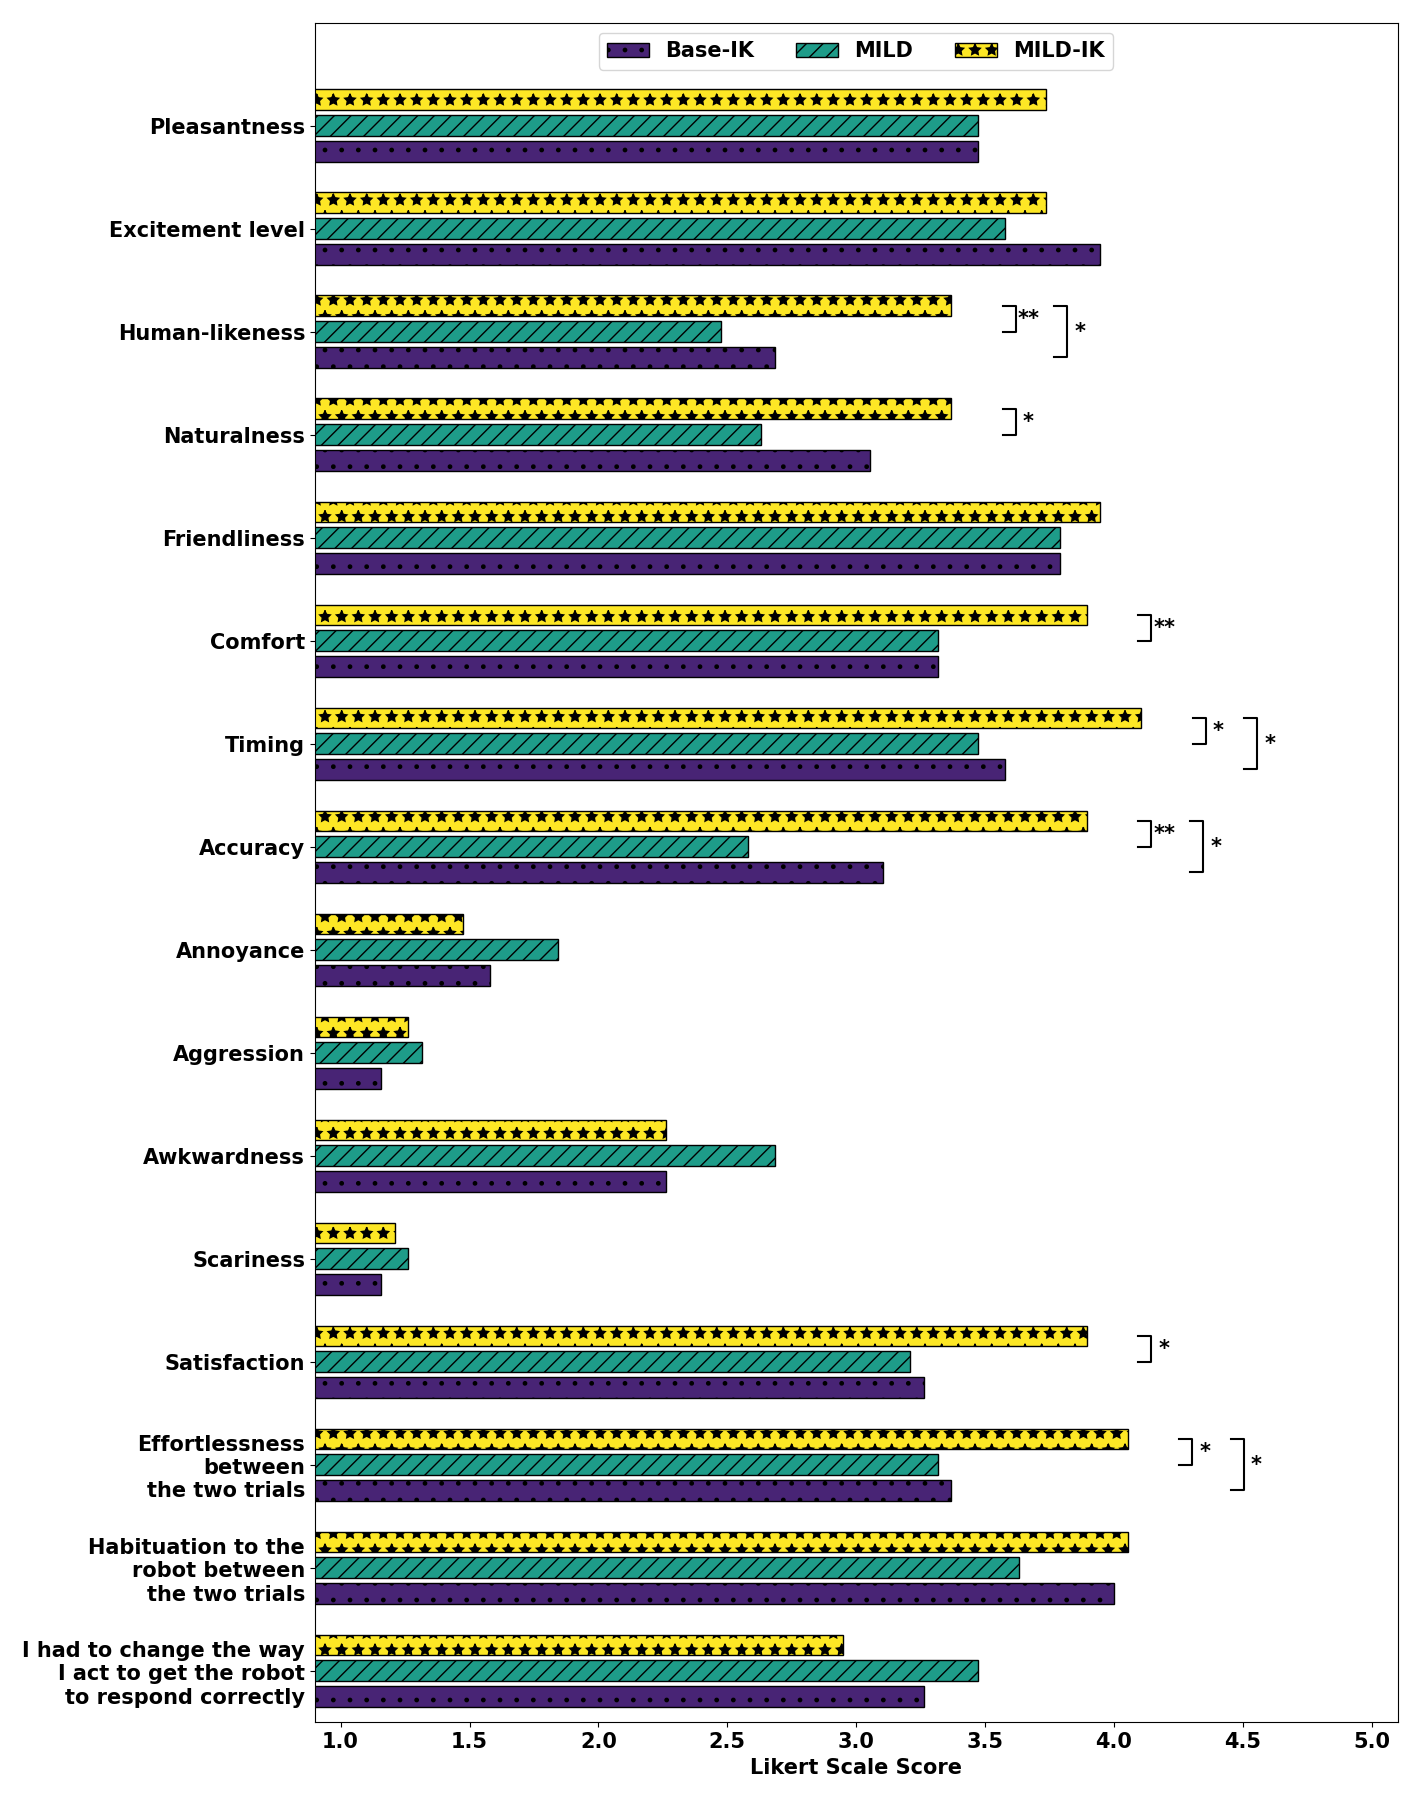

In [35]:

if not boxplot_kwargs['vert']:
    fig1 = plt.figure(figsize=(7.1*2,9*2))
    ax_bar = fig1.add_subplot(1,1,1)

    for idx in range(len(labels_to_use)):
        i = len(labels_to_use) -1 - idx
        res12 = stat_test(baseik_values[:, idx], mild_values[:, idx])
        res13 = stat_test(baseik_values[:, idx], mildik_values[:, idx])
        res23 = stat_test(mild_values[:, idx], mildik_values[:, idx])
        count = False
        ymax = np.max([baseik_values[:, idx].mean(0), mild_values[:, idx].mean(0), mildik_values[:, idx].mean(0)])
        if res12.pvalue < 0.05:
            count = True
            ax_bar.plot( np.array([0.2,0.25,0.25,0.2])+ymax, [i-spacing,i-spacing,i,i],'k-')
            if res12.pvalue < 0.01:
                ax_bar.text(ymax+0.3, i-spacing/2, '**', horizontalalignment='center', verticalalignment='center')
            else:
                ax_bar.text(ymax+0.3, i-spacing/2, '*', horizontalalignment='center', verticalalignment='center')
        if res23.pvalue < 0.05:
            count = True
            ax_bar.plot(np.array([0.2,0.25,0.25,0.2])+ymax, [i,i,i+spacing,i+spacing], 'k-')
            if res23.pvalue < 0.01:
                ax_bar.text(ymax+0.3, i+spacing/2, '**', horizontalalignment='center', verticalalignment='center')
            else:
                ax_bar.text(ymax+0.3, i+spacing/2, '*', horizontalalignment='center', verticalalignment='center')
        if res13.pvalue < 0.05:
            ax_bar.plot(np.array(np.array([0.2,0.25,0.25,0.2])+ymax)+count*0.2, [i-spacing,i-spacing,i+spacing,i+spacing], 'k-')
            if res13.pvalue < 0.01:
                ax_bar.text(ymax+0.3+count*0.2, i, '**', horizontalalignment='center', verticalalignment='center')
            else:
                ax_bar.text(ymax+0.3+count*0.2, i, '*', horizontalalignment='center', verticalalignment='center')

    ax_bar.barh(np.arange(len(labels_to_use))-spacing, baseik_values.mean(0)[::-1], color=colors[0], height=width, label=methods[0], edgecolor='k', hatch=baseik_hatch)#, yerr=baseik_values.std(0), ecolor='blue', capsize=5)
    ax_bar.barh(np.arange(len(labels_to_use)), mild_values.mean(0)[::-1], color=colors[1], height=width, label=methods[1], edgecolor='k', hatch=mild_hatch)#, yerr=mild_values.std(0), ecolor='blue', capsize=5)
    ax_bar.barh(np.arange(len(labels_to_use))+spacing, mildik_values.mean(0)[::-1], color=colors[2], height=width, label=methods[2], edgecolor='k', hatch=mildik_hatch)#, yerr=mildik_values.std(0), ecolor='blue', capsize=5)

    ax_bar.set_xlabel('Likert Scale Score')
    ax_bar.set_yticks(np.arange(len(labels_to_use)), labels_to_use)
    ax_box.set_xticks(np.arange(5)+1, np.arange(5)+1)
    ax_bar.set_xlim(0.9,5.1)
    ax_bar.set_ylim(-0.5, len(labels_to_use))

else:
    fig1 = plt.figure(figsize=(len(labels_to_use)*2,14))
    ax_bar = fig1.add_subplot(1,1,1)

    for i in range(len(labels_to_use)):
        res12 = stat_test(baseik_values[:, i], mild_values[:, i])
        res13 = stat_test(baseik_values[:, i], mildik_values[:, i])
        res23 = stat_test(mild_values[:, i], mildik_values[:, i])
        count = False
        ymax = np.max([baseik_values[:, i].mean(0), mild_values[:, i].mean(0), mildik_values[:, i].mean(0)])
        if res12.pvalue < 0.05:
            count = True
            ax_bar.plot([i-spacing,i-spacing,i,i], np.array([0.2,0.25,0.25,0.2])+ymax, 'k-')
            if res12.pvalue < 0.01:
                ax_bar.text(i-spacing/2, ymax+0.3, '**', horizontalalignment='center', verticalalignment='center')
            else:
                ax_bar.text(i-spacing/2, ymax+0.3, '*', horizontalalignment='center', verticalalignment='center')
        if res23.pvalue < 0.05:
            count = True
            ax_bar.plot([i,i,i+spacing,i+spacing],np.array([0.2,0.25,0.25,0.2])+ymax, 'k-')
            if res23.pvalue < 0.01:
                ax_bar.text(i+spacing/2, ymax+0.3, '**', horizontalalignment='center', verticalalignment='center')
            else:
                ax_bar.text(i+spacing/2, ymax+0.3, '*', horizontalalignment='center', verticalalignment='center')
        if res13.pvalue < 0.05:
            ax_bar.plot([i-spacing,i-spacing,i+spacing,i+spacing],np.array(np.array([0.2,0.25,0.25,0.2])+ymax)+count*0.2, 'k-')
            if res13.pvalue < 0.01:
                ax_bar.text(i, ymax+0.3+count*0.2, '**', horizontalalignment='center', verticalalignment='center')
            else:
                ax_bar.text(i, ymax+0.3+count*0.2, '*', horizontalalignment='center', verticalalignment='center')

    ax_bar.bar(np.arange(len(labels_to_use))-spacing, baseik_values.mean(0), color=colors[0], width=width, label=methods[0], edgecolor='k', hatch=baseik_hatch)#, yerr=baseik_values.std(0), ecolor='blue', capsize=5)
    ax_bar.bar(np.arange(len(labels_to_use)), mild_values.mean(0), color=colors[1], width=width, label=methods[1], edgecolor='k', hatch=mild_hatch)#, yerr=mild_values.std(0), ecolor='blue', capsize=5)
    ax_bar.bar(np.arange(len(labels_to_use))+spacing, mildik_values.mean(0), color=colors[2], width=width, label=methods[2], edgecolor='k', hatch=mildik_hatch)#, yerr=mildik_values.std(0), ecolor='blue', capsize=5)

    ax_bar.set_ylabel('Likert Scale Score')
    ax_bar.set_xticks(np.arange(len(labels_to_use)), labels_to_use)
    ax_bar.set_ylim(0.5,5.6)
    ax_bar.set_xlim(-0.5, len(labels_to_use) - 0.5)
ax_bar.legend(loc='upper center', ncol=3, prop=legend_props)
plt.tight_layout()
plt.savefig('userstudy_barplot.pdf')
plt.show()


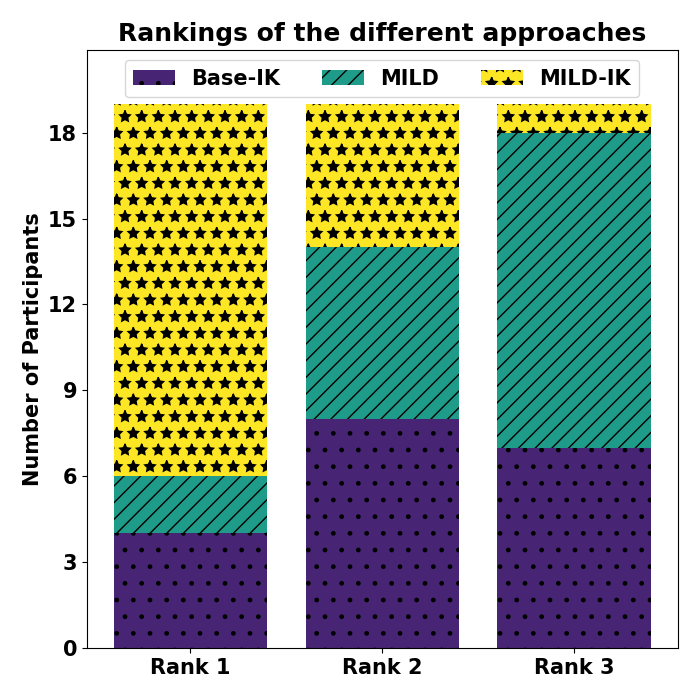

In [36]:
ranks = np.zeros((3,3))
ranks[0,0] = len(np.where(baseik_ranks==1)[0])
ranks[0,1] = len(np.where(baseik_ranks==2)[0])
ranks[0,2] = len(np.where(baseik_ranks==3)[0])
# ranks[0] /= ranks[0].sum()
# ranks[0] *= 100

ranks[1,0] = len(np.where(mild_ranks==1)[0])
ranks[1,1] = len(np.where(mild_ranks==2)[0])
ranks[1,2] = len(np.where(mild_ranks==3)[0])
# ranks[1] /= ranks[1].sum()
# ranks[1] *= 100

ranks[2,0] = len(np.where(mildik_ranks==1)[0])
ranks[2,1] = len(np.where(mildik_ranks==2)[0])
ranks[2,2] = len(np.where(mildik_ranks==3)[0])
# ranks[2] /= ranks[2].sum()
# ranks[2] *= 100

# plot bars in stack manner
plt.figure(figsize=(7,7))
plt.bar(np.arange(3), ranks[0], color=colors[0], hatch=baseik_hatch, label=methods[0])
plt.bar(np.arange(3), ranks[1], bottom=ranks[0], color=colors[1], hatch=mild_hatch, label=methods[1])
plt.bar(np.arange(3), ranks[2], bottom=ranks[0]+ranks[1], color=colors[2], hatch=mildik_hatch, label=methods[2])
plt.ylim(0,ranks[1].sum()*1.1)
plt.ylabel('Number of Participants')
plt.xticks([0,1,2], ['Rank 1', 'Rank 2', 'Rank 3'])
plt.yticks(np.arange(0,ranks[1].sum()+1,3))
plt.legend(loc='upper center', ncol=3, prop=legend_props)
plt.title("Rankings of the different approaches")
plt.tight_layout()
plt.savefig('userstudy_ranking.pdf')
plt.show()